# HOSPITAL RATING CLASSIFICATION

Welcome to the Starter Code for the Hospital Rating Classification Capstone Project!

In this notebook you'll find 
- A blueprint on how to attempt the course project.
- Additional hints and directions on different tasks

Please note that this approach is one of the many approaches you can take for solving this Capstone project.

### Import the necessary libraries

In [1]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Task 1 

Task 1: Understand the data

 

Take some time to familiarize yourself with the data. What are the key variables?

Specifically, answer the following questions:

- 1.1 - Perform a few basic data quality checks to understand the different columns and prepare descriptive statistics for some of the important columns.
- 1.2 - What is the distribution of hospital overall ratings? How are they varying across other parameters like `State`? Create  a few visualizations that provide some insights into the data.

##### Task 1.1

In [3]:
df = pd.read_csv("hospital-info.csv")
df
## Write the code to load the dataset ##

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,...,-1.87000,-0.000000,-0.422000,-0.787,-6.400000,-0.900000,-7.100000,-2.400000,-38.100000,-6.900000
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,...,-0.38600,-0.871177,-1.388000,-0.405,-13.300000,-10.200000,-5.300000,-4.000000,-42.800000,-5.100000
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,...,-0.31000,-0.871177,-1.261000,-0.513,-11.800000,-4.600000,-0.000000,-4.600000,-45.600000,-9.100000
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Voluntary,Yes,...,-0.96398,-0.871177,-0.987212,-0.000,-24.300000,-6.100000,-4.716942,-2.964405,-39.964766,-20.700000
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.585,-3.600000,-2.936245,-4.716942,-0.600000,-39.964766,-8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,670085,TEXAS HEALTH HARRIS METHODIST HOSPITAL ALLIANCE,10864 TEXAS HEALTH TRAIL,FORT WORTH,TX,76244,TARRANT,6822122000,Voluntary,Yes,...,-2.97300,-0.871177,-0.987212,-1.557,-0.600000,-2.936245,-4.716942,-7.200000,-39.964766,-10.800000
3053,670088,BAYLOR SCOTT & WHITE MEDICAL CENTER- COLLEGE S...,700 SCOTT & WHITE DRIVE,COLLEGE STATION,TX,77845,BRAZOS,9796913701,Voluntary,Yes,...,-0.96900,-0.871177,-0.987212,-0.506,-6.100000,-0.000000,-3.300000,-2.964405,-35.600000,-6.200000
3054,670092,WALNUT HILL MEDICAL CENTER,7502 GREENVILLE AVENUE,DALLAS,TX,75231,DALLAS,9728636000,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.399,-10.700000,-4.600000,-4.716942,-2.964405,-39.964766,-9.144957
3055,670096,"BAY AREA REGIONAL MEDICAL CENTER, LLC",200 BLOSSOM STREET,WEBSTER,TX,77598,HARRIS,2815257000,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.243,-8.692897,-2.936245,-4.716942,-2.964405,-39.964766,-9.144957


In [4]:
##Check the data type of the different columns
## Hint - You can use the .info() method here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

Note down your observations after completing the above task. You should ask questions such as:

- Check for non-null columns. Do you see any column having missing values?
- Are the datatypes correct for all the variables? You might have to convert a few of them to categorical later

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Provider ID        0
Hospital Name      0
Address            0
City               0
State              0
                  ..
MED_OP_11_Score    0
MED_OP_13_Score    0
MED_OP_14_Score    0
MED_OP_8_Score     0
MED_OP_9_Score     0
Length: 94, dtype: int64


In [6]:
print(df.dtypes)

Provider ID          int64
Hospital Name       object
Address             object
City                object
State               object
                    ...   
MED_OP_11_Score    float64
MED_OP_13_Score    float64
MED_OP_14_Score    float64
MED_OP_8_Score     float64
MED_OP_9_Score     float64
Length: 94, dtype: object


##### Task 1.2

In [7]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']


In [8]:
### Filter out the above columns from the DataFrame and compute the descriptive statistics
### Hint - The .describe() method might be useful

descriptive_stats = df[features].describe()
descriptive_stats

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
count,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,1.018973,1.042852,0.981681,0.937848,1.192673,0.976447,1.006215
std,0.492383,0.693884,0.731887,0.799253,0.647062,0.750720,0.478217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [9]:
### Analyze your target variable - "Hospital overall rating"
### How does the ratings distribution look like for all the hospitals?
## Hint - You can use seaborn plots like countplot() for checking distribution of the ratings
## Hint - You can plot a correlation heatmap to check the correlation between the main measures stored in "features"
## Hint - You can also check the correlations between the "Hospital overall rating" and other measures


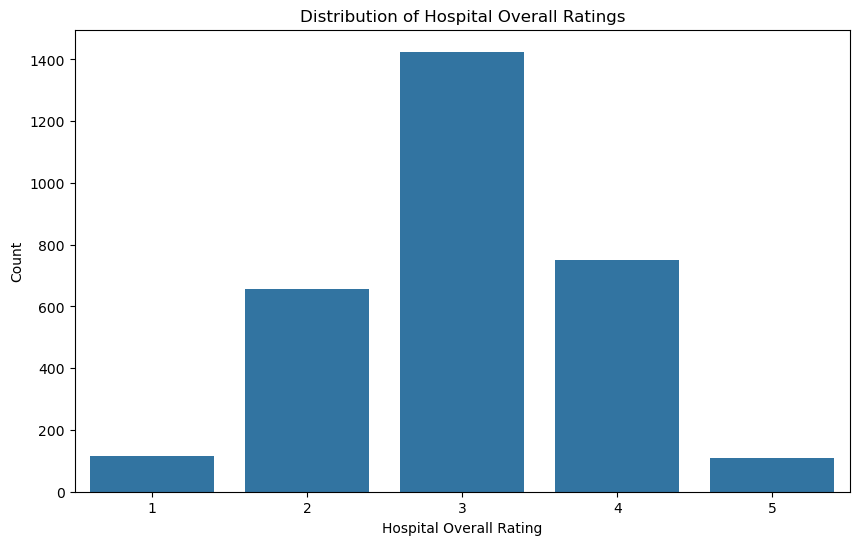

In [10]:
#countplot() for checking distribution of the ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Hospital overall rating', data=df)
plt.title('Distribution of Hospital Overall Ratings')
plt.xlabel('Hospital Overall Rating')
plt.ylabel('Count')
plt.show()

In [11]:
correlation_matrix = df[features].corr()
correlation_matrix

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
Mortality national comparison,1.000000,-0.015789,-0.092562,-0.003655,0.031659,-0.110332,0.009227
Safety of care national comparison,-0.015789,1.000000,0.053738,0.110420,0.082909,0.094908,-0.010664
Readmission national comparison,-0.092562,0.053738,1.000000,0.263206,-0.013965,0.140957,-0.003414
Patient experience national comparison,-0.003655,0.110420,0.263206,1.000000,0.016203,0.292600,0.018990
Effectiveness of care national comparison,0.031659,0.082909,-0.013965,0.016203,1.000000,-0.047240,0.083900
Timeliness of care national comparison,-0.110332,0.094908,0.140957,0.292600,-0.047240,1.000000,-0.125375
Efficient use of medical imaging national comparison,0.009227,-0.010664,-0.003414,0.018990,0.083900,-0.125375,1.000000


In [12]:
df.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Ownership',
       'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score',
       'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score',
       'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score',
       'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 

In [13]:
if 'Hospital overall rating' in correlation_matrix.columns:
    # Compute correlations with "Hospital overall rating"
    correlations_with_rating = correlation_matrix['Hospital overall rating'].sort_values(ascending=False)
    print("Correlations with Hospital overall rating:\n", correlations_with_rating)
else:
    print("'Hospital overall rating' not found in the correlation matrix.")

'Hospital overall rating' not found in the correlation matrix.


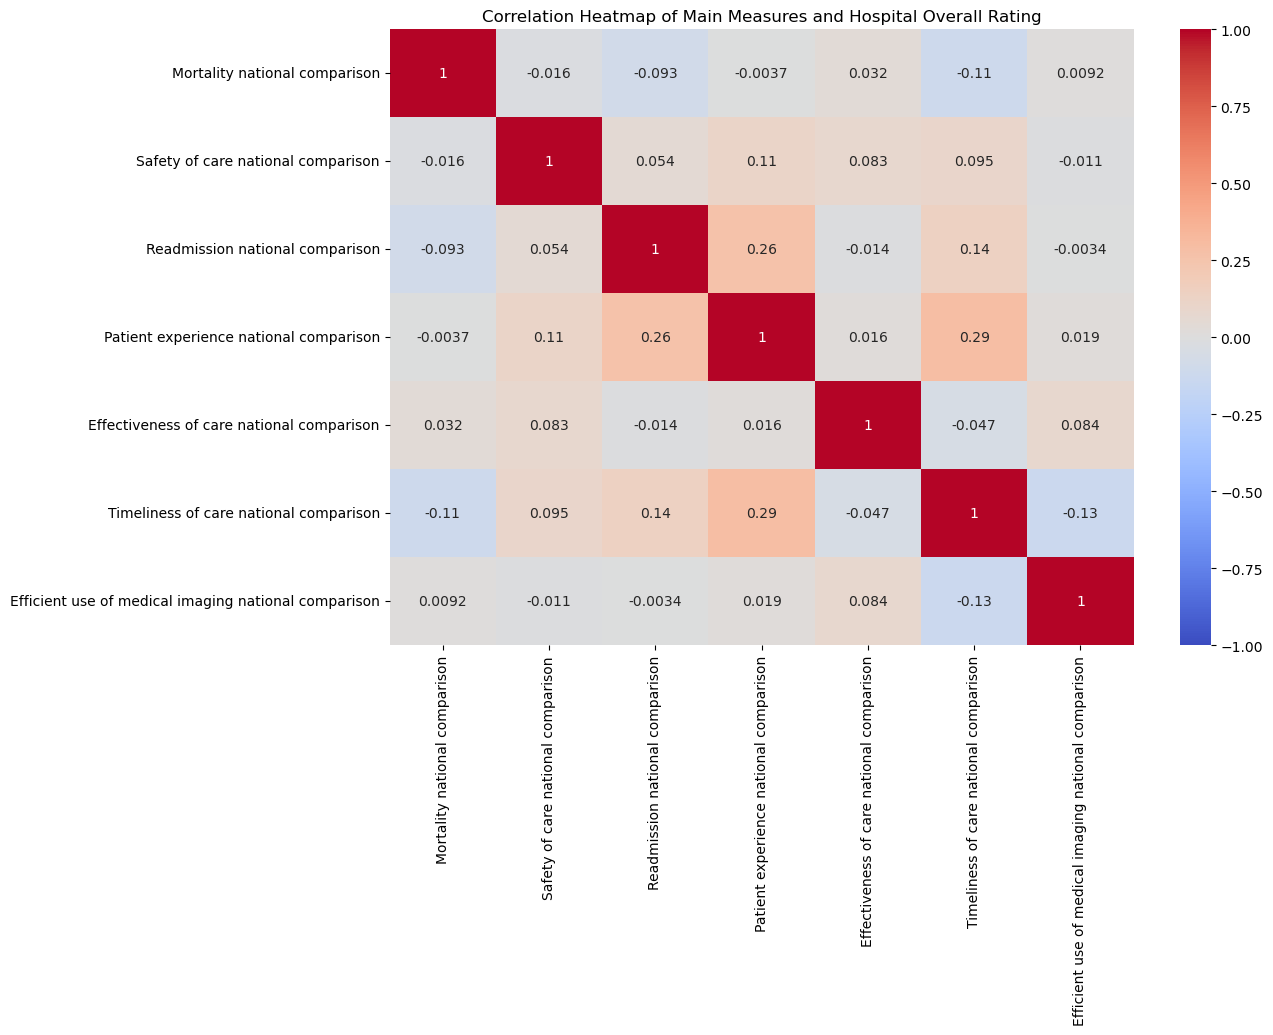

In [14]:
#correlation heatmap "Hospital overall rating"
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Main Measures and Hospital Overall Rating')
plt.show()


In [15]:
### Check how the hospital ratings vary across other parameters
### Hint - Some example parameters are "State" and "Hospital Ownership"
### Hint - You can use the pivot_table functionality of pandas to perform this

In [16]:
print(df['State'].unique())
print("******************")
print(df['Hospital Ownership'].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']
******************
['Government' 'Voluntary' 'Others']


In [17]:
# Pivot table for hospital ratings across states
state_ratings = pd.pivot_table(df, values='Hospital overall rating', index='State', aggfunc='mean')

# Pivot table for hospital ratings across hospital ownership types
ownership_ratings = pd.pivot_table(df, values='Hospital overall rating', index='Hospital Ownership', aggfunc='mean')


<Axes: title={'center': 'Mean Hospital Ratings by Ownership'}, xlabel='Hospital Ownership'>

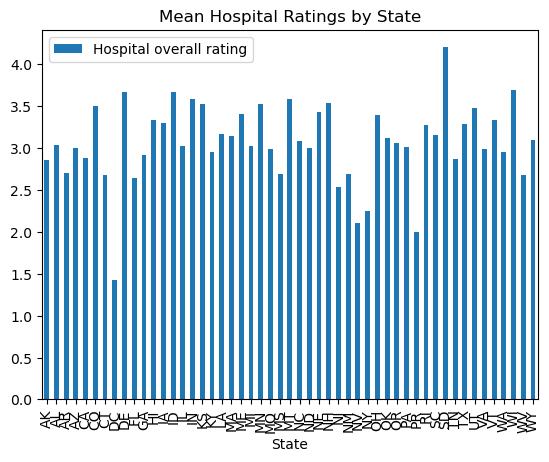

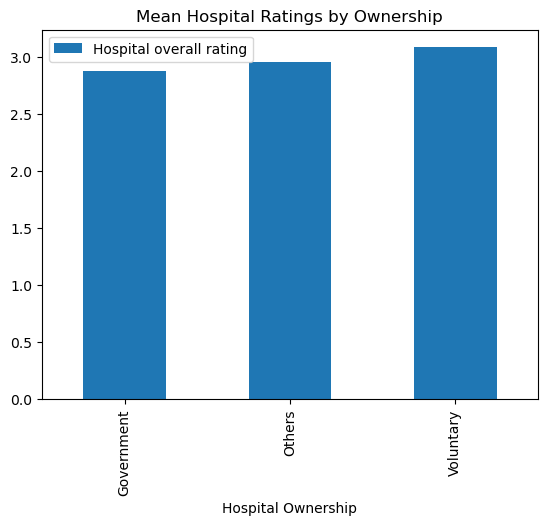

In [18]:
# Plot the pivot tables
state_ratings.plot(kind='bar', title='Mean Hospital Ratings by State')
ownership_ratings.plot(kind='bar', title='Mean Hospital Ratings by Ownership')



Note down your observations after completing the above task. You should ask questions such as:

- How are ratings distributed? the Are you seeing any peculiar distributions for the ratings?
- How do the correlations between the measures and the target variable look like?
- How do ratings vary across the different levels of the parameter that you have taken?

### Task 2 - Building machine learning models

Use your knowledge of classification models to create three models that predict hospital ratings. You should follow these steps:

- Prepare the data for the machine learning model 
   - Remove all the demographic columns as well as any other uneccessary features from the data set
   - For simplification, instead of having 5 ratings, we will convert them to 0 and 1. Here 0 indicates that the hospital has been rated 3 or below and 1 indicates that the hospital has been rated as 4 or 5.  Encode the Hospital columns as follows
            1,2,3 : 0
            4,5: 1
   - Store the predictors and the target variable in variables X and y.
   - Create the dummy variables for categorical columns.
   - Split the data into train and test sets (70-30 split with random state 0. This random state is recommended, though you can use any other random state of your choice).
   - Scale the numerical columns using StandardScaler.
- Build 3 classification models on your dataset. Carefully apply regularization and hyperparameter tuning techniques to improve your model performance for each of the models.
- Summarize the classification performance in terms of the necessary metrics such as accuracy, sensitivity, specificity, etc.

#####  Prepare the data for machine learning model

In [19]:
## Drop all the demographic features
demo_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [20]:
## Drop all the above features from the DataFrame df and store the rest of the features in df2
# Drop demographic features
demo_features = ['Provider ID','Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number']
df2 = df.drop(columns=demo_features)

In [21]:
### Check the first 5 rows of df2 to see if the drop operation has worked correctly or not
df2.head()

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,Government,Yes,3,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,Government,Yes,2,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,Voluntary,Yes,3,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,Others,Yes,3,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [22]:
##Recheck the columns to see if anything else needs to be dropped
## There might be other unnecessary columns that require dropping
df2.columns

Index(['Hospital Ownership', 'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score',
       'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score',
       'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score',
       'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 'EFF_IMM_2_Score',
       'EFF_IMM_3_OP_27_FAC_ADHPCT_Score', 'EFF_OP_18b_Score',
       'EFF_OP_20_Score', 'EFF_OP_2

##### Map the ratings 

- 1,2,3 will be 0
- 4,5 will be 1

In [23]:
## Hint -  Write a simple lambda function to do the mapping
## Refer to this link from Course 1 for more help -  https://learn.upgrad.com/course/2897/segment/16179/128948/394776/2054363

In [24]:
# Define a lambda function to map the ratings
map_ratings = lambda x: 0 if x <= 3 else 1

# Apply the lambda function to the 'Hospital overall rating' column
df2['Hospital overall rating'] = df2['Hospital overall rating'].apply(map_ratings)

# Check the unique values in the 'Hospital overall rating' column to verify the mapping
print(df2['Hospital overall rating'].unique())


[0 1]


In [25]:
print(df2['Hospital overall rating'])

0       0
1       0
2       0
3       0
4       0
       ..
3052    1
3053    0
3054    0
3055    0
3056    0
Name: Hospital overall rating, Length: 3057, dtype: int64


##### Convert the datatypes of the categorical variables

In [26]:
### In task 1, you would have identified the categorical variables, which may or may not be in their correct data types
### Now is the right time to convert them to the correct datatype 
### This will be useful when you create dummy variables next

In [27]:
print(df2.columns)

Index(['Hospital Ownership', 'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score',
       'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score',
       'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score',
       'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 'EFF_IMM_2_Score',
       'EFF_IMM_3_OP_27_FAC_ADHPCT_Score', 'EFF_OP_18b_Score',
       'EFF_OP_20_Score', 'EFF_OP_2

In [28]:
# Convert 'Hospital Ownership' to the correct data type
df2['Hospital Ownership'] = df2['Hospital Ownership'].astype('category')

# Check the data types of categorical variables after conversion
print(df2.dtypes)


Hospital Ownership                    category
Emergency Services                      object
Hospital overall rating                  int64
Mortality national comparison            int64
Safety of care national comparison       int64
                                        ...   
MED_OP_11_Score                        float64
MED_OP_13_Score                        float64
MED_OP_14_Score                        float64
MED_OP_8_Score                         float64
MED_OP_9_Score                         float64
Length: 86, dtype: object


In [29]:
df2.head()

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,0,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,Government,Yes,0,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,Government,Yes,0,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,Voluntary,Yes,0,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,Others,Yes,0,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


##### Data Preparation and Train-test split

In [30]:
### Create X and y variable

In [31]:
# Assuming 'Hospital overall rating' is the target variable
X = df2.drop(columns=['Hospital overall rating'])  # Predictor variables
y = df2['Hospital overall rating']  # Target variable

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (3057, 85)
Shape of y: (3057,)


In [32]:
### Create the dummy variables for categorical variables
### Note - Make sure the "drop_first parameter" is correctly initialized for different ML models
### Hint - You can create multiple versions of the X dataset


In [33]:
# Create a copy of the original DataFrame to avoid modifying it directly
df_dummy = df2.copy()

X_dummy_drop_first = pd.get_dummies(df_dummy, columns=['Hospital Ownership'], drop_first=True)
X_dummy_no_drop = pd.get_dummies(df_dummy, columns=['Hospital Ownership'])
print("Shape of X_dummy_drop_first:", X_dummy_drop_first.shape)
print("Shape of X_dummy_no_drop:", X_dummy_no_drop.shape)


Shape of X_dummy_drop_first: (3057, 87)
Shape of X_dummy_no_drop: (3057, 88)


In [34]:
## Perform the train_test split to create the train and validation sets
## Choose any random state of your choice 
## Split it in the ratio of 70-30


In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (2139, 85)
Shape of X_val: (918, 85)
Shape of y_train: (2139,)
Shape of y_val: (918,)


In [36]:
# Scale and Standardize the numerical variables

In [37]:
from sklearn.preprocessing import StandardScaler

numerical_columns = X.select_dtypes(include=['int', 'float']).columns.tolist()

scaler = StandardScaler()
X_train_scaled = X_train.copy()  
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train_scaled[numerical_columns])

X_val_scaled = X_val.copy()  
X_val_scaled[numerical_columns] = scaler.transform(X_val_scaled[numerical_columns])


In [38]:
(X_train.head())

,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
2941,Others,Yes,1,1,0,0,1,1,1,-15.000000,...,-0.97700,-0.871177,-0.857000,-1.530,-5.0,-9.600000,-6.400000,-2.964405,-47.500000,-1.100000
229,Voluntary,Yes,1,1,1,1,1,0,1,-15.000000,...,-0.44900,-0.871177,-0.987212,-1.058,-4.7,-0.700000,-3.500000,-2.964405,-39.964766,-7.500000
2770,Others,Yes,1,1,2,1,1,2,1,-14.054091,...,-0.96398,-0.871177,-0.987212,-2.386,-2.5,-2.200000,-3.000000,-1.100000,-52.200000,-8.500000
3022,Others,Yes,1,1,2,2,1,2,1,-14.054091,...,-0.96398,-0.871177,-0.987212,-0.000,-3.0,-2.936245,-4.716942,-2.964405,-39.964766,-9.144957
2973,Voluntary,Yes,1,2,1,2,1,2,2,-17.800000,...,-1.19300,-0.871177,-0.886000,-0.980,-2.3,-0.500000,-5.200000,-1.900000,-34.000000,-5.500000


In [39]:
(X_train_scaled.head())

,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
2941,Others,Yes,-0.026559,-0.079287,-1.330710,-1.180814,-0.298833,0.024851,-0.019421,-0.849287,...,-0.023516,0.007916,0.176826,-1.425173,0.407437,-1.295925,-1.021929,-0.026471,-1.575913,1.618009
229,Voluntary,Yes,-0.026559,-0.079287,0.024713,0.068944,-0.298833,-1.304037,-0.019421,-0.849287,...,0.803249,0.007916,-0.022625,-0.448593,0.441739,0.442599,0.752870,-0.026471,0.008660,0.342315
2770,Others,Yes,-0.026559,-0.079287,1.380137,0.068944,-0.298833,1.353738,-0.019421,-0.000394,...,-0.003128,0.007916,-0.022625,-3.196258,0.693291,0.149589,1.058870,1.307144,-2.564269,0.142987
3022,Others,Yes,-0.026559,-0.079287,1.380137,1.318702,-0.298833,1.353738,-0.019421,-0.000394,...,-0.003128,0.007916,-0.022625,1.740435,0.636120,0.005771,0.008103,-0.026471,0.008660,0.014430
2973,Voluntary,Yes,-0.026559,1.357963,0.024713,1.318702,-0.298833,1.353738,2.057627,-3.362110,...,-0.361737,0.007916,0.132406,-0.287209,0.716159,0.481666,-0.287529,0.734902,1.262982,0.740969


In [40]:

(X_val.head())


,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
1764,Voluntary,Yes,1,1,1,1,1,2,1,-13.600000,...,-0.96398,-0.871177,-0.987212,-0.617,-6.6,-0.0,-3.000000,-2.964405,-39.964766,-20.700000
203,Voluntary,Yes,2,1,2,0,2,0,1,-12.000000,...,-0.44300,-0.811000,-0.998000,-1.340,-8.7,-0.8,-7.300000,-1.800000,-39.964766,-5.800000
1356,Voluntary,Yes,1,2,2,0,1,1,1,-14.054091,...,-0.48600,-0.749000,-0.000000,-1.163,-6.7,-0.0,-4.716942,-0.700000,-42.400000,-5.000000
1451,Voluntary,Yes,1,1,1,1,1,1,1,-12.700000,...,-0.60100,-0.871177,-0.000000,-1.050,-15.0,-1.1,-3.400000,-2.964405,-39.964766,-9.144957
1577,Voluntary,Yes,2,1,0,0,1,0,2,-14.100000,...,-0.54200,-1.647000,-0.292000,-0.678,-1.4,-0.0,-6.100000,-3.600000,-39.964766,-7.700000


In [41]:

(X_val_scaled.head())

,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
1764,Voluntary,Yes,-0.026559,-0.079287,0.024713,0.068944,-0.298833,1.353738,-0.019421,0.407124,...,-0.003128,0.007916,-0.022625,0.463847,0.224490,0.579336,1.058870,-0.026471,0.008660,-2.288805
203,Voluntary,Yes,2.002324,-0.079287,1.380137,-1.180814,1.252631,-1.304037,-0.019421,1.843023,...,0.812644,0.147835,-0.039150,-1.032058,-0.015628,0.423065,-1.572728,0.806432,0.008660,0.681171
1356,Voluntary,Yes,-0.026559,1.357963,1.380137,-1.180814,-0.298833,0.024851,-0.019421,-0.000394,...,0.745313,0.291995,1.489532,-0.665841,0.213056,0.579336,0.008103,1.593266,-0.503441,0.840633
1451,Voluntary,Yes,-0.026559,-0.079287,0.024713,0.068944,-0.298833,0.024851,-0.019421,1.214817,...,0.565241,0.007916,1.489532,-0.432041,-0.735981,0.364463,0.814070,-0.026471,0.008660,0.014430
1577,Voluntary,Yes,2.002324,-0.079287,-1.330710,-1.180814,-0.298833,-1.304037,2.057627,-0.041594,...,0.657625,-1.795993,1.042262,0.337636,0.819067,0.579336,-0.838329,-0.481114,0.008660,0.302449


#####  Model building and evaluation

You have learned multiple classification models till now, such as logistic regression, k-NN and decision trees. You should choose 3 of the models for performing the tasks in this section. You can follow the below steps:


- Build the models and fit it on training data
- Perform classifications on the validation data
- Compute and tabulate the validation accuracies for the different models
- Compare the accuracies for the different models and choose the best model

**Note** - You can also evaluate your models using additional metrics like `F1 score`, `Sensitivity`,`Specificity` , etc.


**Helpful Resource** - For writing precise code for this section, you can refer to the code you learned in Model Selection Lab Session in the `kNN and Model Selection` module.




- Additional notes
  - You can peform additional tasks like building ROC/AUC curves for all the models and identifying an optimal cut-off
  - You can also build conjectures around some arbitrary metric cut-offs. For example, say you want to build a model which has atleast 50% accuracy, specificity and sensitivity. Use these conjectures to arrive at a final model
  - Note that there is no right answer for this particular question. You will be awarded marks as long as your overall approach is correct

### Task 3 

You have now built (at least) three machine learning models. Choose the best model according to your metrics and provide the following recommendations
-  Hospital Rating Predictor: Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.
- Hospital Improvement Plan: Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

In [42]:
###Let's read the not_yet_rated dataset
### Write your code to load the dataset


In [43]:
new_hospitals = pd.read_csv("not_yet_rated.csv")
new_hospitals 

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,520189,Government,Yes,2,1,2,2,2,2,1,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,370029,Government,No,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,370032,Others,Yes,1,2,1,0,1,1,1,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,370036,Government,Yes,1,1,1,1,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957
5,370037,Voluntary,Yes,1,2,0,1,1,1,0,...,-0.41000,-0.871177,-1.179000,-0.68600,-17.900000,-7.100000,-4.000000,-2.500000,-37.900000,-15.000000


In [44]:
new_hospitals.columns

Index(['Provider ID', 'Hospital Ownership', 'Emergency Services',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score',
       'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score',
       'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score',
       'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 'EFF_IMM_2_Score',
       'EFF_IMM_3_OP_27_FAC_ADHPCT_Score', 'EFF_OP_18b_Score',
       'EFF_OP_20_Score', 'EFF_OP_22_Score', 'E

### Approach to predict ratings
- Perform the exact same data preparation steps as earlier
   - Drop the unnecessary columns
   - Convert the datatypes of categorical variables and create dummies
   - Standardize the numeric columns
- After that we shall use the `.predict()` method of your ML model to predict the ratings

In [45]:
columns_to_drop = ['Provider ID', 'Hospital Ownership']
new_hospitals = new_hospitals.drop(columns=columns_to_drop)

In [46]:
new_hospitals

,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Yes,1,1,2,2,2,2,1,-12.500000,-3.331371,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,Yes,2,1,2,2,2,2,1,-13.800000,-3.331371,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,No,1,1,1,1,1,2,1,-14.054091,-3.331371,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,Yes,1,2,1,0,1,1,1,-15.700000,-3.400000,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,Yes,1,1,1,1,0,2,1,-14.054091,-3.331371,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957
5,Yes,1,2,0,1,1,1,0,-14.200000,-2.600000,...,-0.41000,-0.871177,-1.179000,-0.68600,-17.900000,-7.100000,-4.000000,-2.500000,-37.900000,-15.000000


In [47]:
categorical_columns = ['Emergency Services', 'Mortality national comparison', 'Safety of care national comparison',
                       'Readmission national comparison', 'Patient experience national comparison',
                       'Effectiveness of care national comparison', 'Timeliness of care national comparison',
                       'Efficient use of medical imaging national comparison']
new_hospitals = pd.get_dummies(new_hospitals, columns=categorical_columns)

In [48]:
print(new_hospitals.columns)

Index(['MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score',
       'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score',
       'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score',
       'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 'EFF_IMM_2_Score',
       'EFF_IMM_3_OP_27_FAC_ADHPCT_Score', 'EFF_OP_18b_Score',
       'EFF_OP_20_Score', 'EFF_OP_22_Score', 'EFF_OP_29_Score',
       'EFF_OP_30_Score', 'EFF_OP_4_Score', 'EFF_PC_01_Score',
       'EFF_STK_1_Score', 'EFF_STK_10_Score', 'EFF_STK_2_Score',
       'EFF_STK_4_Score', 'EFF_STK_5_Score', 'EFF_STK_6_Score',
       'EFF_VTE_1_Score', 'EFF_VTE_2_Score', 'EFF_VTE_3_Score',
       'EFF_VTE_5_Score', 'EFF_VTE_6_Score', 'EXP_H_CLEAN_STAR_RATING_Score',
       'EXP_H_COMP_1_STAR_RATING_Score', 'EXP_H_

In [49]:
numeric_columns = new_hospitals.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
new_hospitals[numeric_columns] = scaler.fit_transform(new_hospitals[numeric_columns])

In [50]:
new_hospitals[numeric_columns]

,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,1.664828,-0.396173,-0.453703,-1.777493,1.657008,0.543038,1.414214,-1.964821,0.676668,0.410913,...,0.666333,-1.258293,2.199452,0.245219,1.392226,0.860473,-1.109391,-0.324768,0.235980,0.928754
1,0.269748,-0.396173,-0.244302,0.332059,0.216131,-0.887013,1.414214,0.253279,0.676668,-1.146231,...,-1.264952,2.062744,-0.341176,-0.619558,0.757699,0.902729,-0.668411,0.414574,0.216121,1.179981
2,-0.002927,-0.396173,0.174501,0.332059,-0.432263,-0.171987,-0.707107,0.253279,0.676668,-0.627183,...,-0.768770,-0.201113,-0.341176,2.071577,-1.357392,-1.970650,-0.238104,-0.372385,0.441571,0.237879
3,-1.769215,-0.642325,0.174501,1.035243,-0.792482,-1.602038,-0.707107,-0.178864,-0.850616,-0.692064,...,1.564212,-0.201113,-0.341176,-0.909968,0.017417,0.395662,2.040463,-1.507714,-2.186865,-0.452996
4,-0.002927,-0.396173,1.849713,0.918046,-1.368833,0.859937,-0.707107,0.253279,0.676668,0.151389,...,-0.768770,-0.201113,-0.341176,-0.645276,0.406436,0.345748,-0.238104,1.819324,0.441571,-0.027467
5,-0.159507,2.227017,-1.500710,-0.839914,0.720438,1.258063,-0.707107,1.383848,-1.856054,1.903175,...,0.571947,-0.201113,-0.834749,-0.141994,-1.216386,-0.533961,0.213548,-0.029031,0.851621,-1.866150


### Approach to identify areas of improvement

- Identify the measures which have a positive influence on the overall hospital ratings. For example,
    - if you're using a logistic regression model, you can check the coefficients
        - A +ve coefficient indicates +ve influence on the overall hospital rating
        - A -ve coefficient indicates -ve influence on the overall hospital rating
- Identify in which of the above measures a low-rated hospital is currently lagging behind. These measures need to be improved.
- Further deep dive into the sub-measures using the same approach as above. 

In [51]:
X_train

,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
2941,Others,Yes,1,1,0,0,1,1,1,-15.000000,...,-0.97700,-0.871177,-0.857000,-1.530,-5.0,-9.600000,-6.400000,-2.964405,-47.500000,-1.100000
229,Voluntary,Yes,1,1,1,1,1,0,1,-15.000000,...,-0.44900,-0.871177,-0.987212,-1.058,-4.7,-0.700000,-3.500000,-2.964405,-39.964766,-7.500000
2770,Others,Yes,1,1,2,1,1,2,1,-14.054091,...,-0.96398,-0.871177,-0.987212,-2.386,-2.5,-2.200000,-3.000000,-1.100000,-52.200000,-8.500000
3022,Others,Yes,1,1,2,2,1,2,1,-14.054091,...,-0.96398,-0.871177,-0.987212,-0.000,-3.0,-2.936245,-4.716942,-2.964405,-39.964766,-9.144957
2973,Voluntary,Yes,1,2,1,2,1,2,2,-17.800000,...,-1.19300,-0.871177,-0.886000,-0.980,-2.3,-0.500000,-5.200000,-1.900000,-34.000000,-5.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Others,Yes,1,1,0,0,2,1,2,-13.300000,...,-0.71800,-0.540000,-0.497000,-1.131,-2.0,-0.700000,-4.716942,-4.400000,-39.964766,-11.800000
1095,Government,Yes,1,1,2,2,0,2,0,-14.054091,...,-0.96398,-0.871177,-0.987212,-1.384,-76.1,-0.300000,-4.500000,-1.100000,-36.300000,-5.300000
1130,Voluntary,Yes,1,1,1,1,1,1,1,-16.900000,...,-0.96398,-0.871177,-0.987212,-0.000,-10.5,-16.000000,-4.716942,-2.964405,-39.964766,-21.500000
1294,Voluntary,Yes,1,2,0,1,2,1,1,-14.900000,...,-0.28900,-0.871177,-0.365000,-1.110,-5.6,-2.300000,-6.500000,-3.100000,-34.500000,-7.400000


In [53]:

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:\n", feature_importance)

# Predict ratings for the training data
predicted_ratings = model.predict(X_train)
X_train['Predicted_Rating'] = predicted_ratings
X_train['Actual_Rating'] = y_train

# Define a threshold to classify low-rated hospitals
threshold = 2  # Example threshold for low-rated hospitals
low_rated_hospitals = X_train[X_train['Actual_Rating'] < threshold]

# Select the most influential features for further analysis
# Adjust this list based on your feature_importance analysis
influential_features = feature_importance.head(10)['Feature'].tolist()  # Top 10 positive coefficients
lagging_measures = low_rated_hospitals[influential_features]

print("Lagging Measures in Low-Rated Hospitals:\n", lagging_measures.describe())

# Deep dive into specific sub-measures
for feature in influential_features:
    print(f"Analysis for {feature}")
    print(lagging_measures[feature].describe())
    print("\n")

Feature Importance:
                                    Feature  Coefficient
13                            rating_group     1.096696
60  SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score     0.762692
11                        MORT_30_PN_Score     0.732010
54          EXP_H_COMP_7_STAR_RATING_Score     0.524623
57          EXP_H_RECMND_STAR_RATING_Score     0.488510
..                                     ...          ...
21                      READM_30_STK_Score    -0.230041
16                     READM_30_COPD_Score    -0.378492
20                       READM_30_PN_Score    -0.415488
17                       READM_30_HF_Score    -0.474949
19                READM_30_HOSP_WIDE_Score    -0.611926

[83 rows x 2 columns]
Lagging Measures in Low-Rated Hospitals:
        rating_group  SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score  MORT_30_PN_Score  \
count   2139.000000                             2139.000000       2139.000000   
mean       1.031323                               -5.017610        -16.368185   